In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
df_index=pd.read_csv("economic_index.csv")

In [10]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [12]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

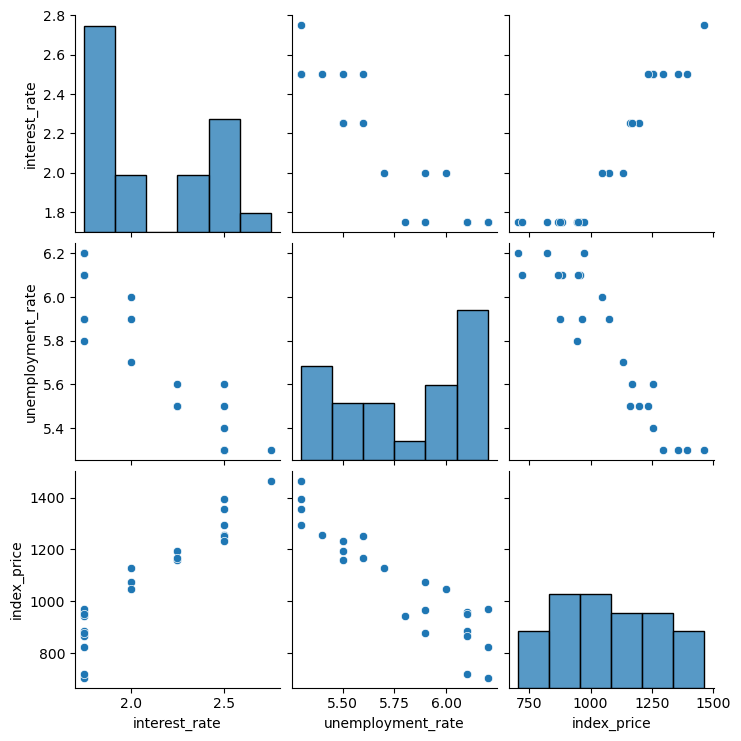

In [ ]:
import seaborn as sns
sns.pairplot(df_index)

In [15]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

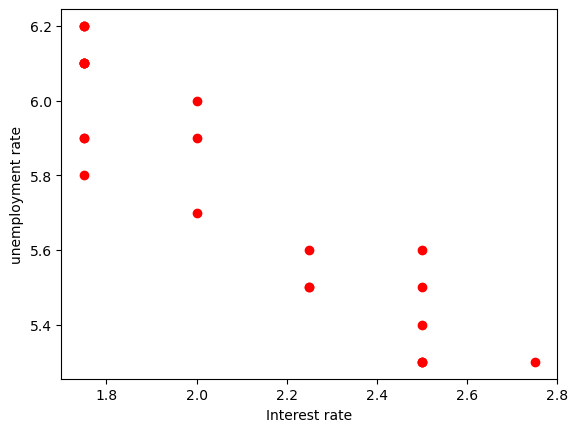

In [ ]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [ ]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [22]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [25]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
import seaborn as sns


In [ ]:
sns.regplot(df_index['interest_rate'],df_index['index_price']) 

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
sns.regplot(df_index['interest_rate'],df_index['unemployment_rate'])

In [ ]:
sns.regplot(df_index['index_price'],df_index['unemployment_rate'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train

In [35]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [37]:
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [44]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [42]:
np.mean(validation_score)

-5914.82818016239

In [ ]:
y_pred=regression.predict(X_test)

In [42]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [43]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [44]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010254
0.5985619231683756
